# Exercise 3
*CS-E5885 Modeling Biological Networks* <br>
*25th Jan, 2023* <br>

In [4]:
from scipy.integrate import solve_ivp # for deterministic simulation
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

## 0. Introduction

In this exercise we consider the following system [1]:

\begin{align*}
(1) && \emptyset &\xrightarrow{c_1} X_1 &&\text{Transcription of unspliced mRNA } (X_1)\\
(2) && X_2 &\xrightarrow{c_2} \emptyset &&\text{Degradation of spliced mRNA } (X_2) \\
(3) && X_1 &\xrightarrow{c_3} X_2 &&\text{Splicing} \\
\end{align*}

We use notation where $\textbf{x}= [x_1, x_2]^{\top}$ so that $x_1$ is the number of unspliced and $x_2$ the number of spliced RNA molecules and the stochastic rate constants are $\textbf{c}= [c_1, c_2, c_3] = [10.0, 0.25, 0.5]$. Assume that at time $t=0$ the state is $100$ unspliced molecules and $0$ spliced molecules. Another way of saying this is that the initial distribution of molecule counts is a Dirac delta distribution

\begin{equation}
p(\textbf{x}, 0) = \delta_{\textbf{m}}(\textbf{x}) = \begin{cases}
1 \ \ \ \text{ if } \textbf{x} = \textbf{m} \\
0 \ \ \ \text{ otherwise}
\end{cases},
\end{equation}

where $\textbf{m} = [m_1, m_2]^\top = [100, 0]^\top$. We are interested in how this distribution $p(\textbf{x}, t)$  evolves as a function of time $t$. 


#### Optional extra info

Because this system contains only monomolecular reactions, we could actually solve $p(\textbf{x}, t)$ analytically [2] from the chemical master equation, i.e.

\begin{align*}
\frac{d}{dt} p(\textbf{x}, t) &= \sum_{i=1}^3 \left[ h_i(\textbf{x} - S^{(i)}, c_i) p(\textbf{x} - S^{(i)}, t) - h_i(\textbf{x}, c_i) p(\textbf{x}, t)\right],
\end{align*}

but the analytical approach is not going to work in more complex problems.

#### References
[1] La Manno, G., Soldatov, R., Zeisel, A. et al. *RNA velocity of single cells.* Nature 560, 494–498 (2018). https://doi.org/10.1038/s41586-018-0414-6

[2] Jahnke T, Huisinga W. *Solving the chemical master equation for monomolecular reaction systems analytically*. J Math Biol. 54(1):1-26 (2007). https://doi.org/10.1007/s00285-006-0034-x.

## 1. Exact simulation (1.5 p)

The Gillespie algorithm can be used to simulate draws from $p(\textbf{x}, t)$ at a given time $t$.

**a)** Use the Gillespie algorithm to simulate 30 (or more) independent realizations of the system on the time interval $t \in [0, 20]$. Plot each realization in the same figure with time on the x-axis and number of molecules
on the y-axis. Use different colours for $X_1$ and $X_2$.

**b)** Describe the distribution $p(\textbf{x}, 20)$, by computing for both $X_1$ and $X_2$ separately, the mean and variance of the molecule counts at the final timepoint, over the 30 realizations.


You can use your earlier implementation of the Gillespie algorithm as a starting point, or perhaps an existing package that does Gillespie simulation, anything is OK. Anyway you probably want to have your algorithm wrapped in a function like this:

In [5]:
def gillespie_rna(M, c, max_time):
    """Gillespie algorithm for simulating one realization of RNA splicing dynamics.

    :param M: Initial state, numpy array with shape (2, 1).
    :param c: Vector of stochastic rate constants, list with length 3.
    :param max_time: Length of simulation time span, one number.
    
    :return: 
        T - One-dimensional numpy array containing the reaction occurrence times.
        X - Two dimensional numpy array, where the rows contain the system state after each reaction.
    """
    
    T = np.zeros(int(1e4))
    X = np.zeros((int(1e4), 2))
    X[0,:] = M[0],M[1]
    T[0] = 0

    for idx in range(0, int(1e4)-1):
    
        # Calculate the hazard for each reaction and the combined reaction hazard
        # reaction 1
        h0 = c[0]
        #reaction 2
        h1 = c[1]*X[idx,1]
        #reaction 3
        h2 = c[2]*X[idx,0]
        #combined hazard
        h_combined = h0+h1+h2

        # Draw the next reaction time and store it in T[idx+1]
        T[idx+1] = T[idx]+np.random.exponential(scale=1/h_combined) 

        # Determine which reaction happens next
        items = [0, 1, 2]
        probabilities = np.array([h0/h_combined, h1/h_combined, h2/h_combined])
        draw = np.random.choice(items, size = 1, p = probabilities, replace = True)

        #Calculate the updated state
        previous_A = X[idx,0]
        previous_B = X[idx,1]
        if draw == 0:
            X[idx+1, :] = previous_A+1, previous_B

        if draw == 1:
            X[idx+1, :] = previous_A, previous_B-1

        if draw == 2:
            X[idx+1, :] = previous_A-1, previous_B+1

        # Stop if extinction of both species happened
        if sum(X[idx+1, :]) == 0:
            print("Extinction at t = {}".format(T[idx+1]))
            X = X[0:(idx+1), :]
            T = T[0:(idx+1)]
            break

        # Stop if max time reached
        current_time = T[idx+1]
        if current_time > max_time:
            print("Reached max time.")
            X = X[0:(idx+1), :]
            T = T[0:(idx+1)]
            break
    
    
    return T, X
 

Which you could then call for example like this:

Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.


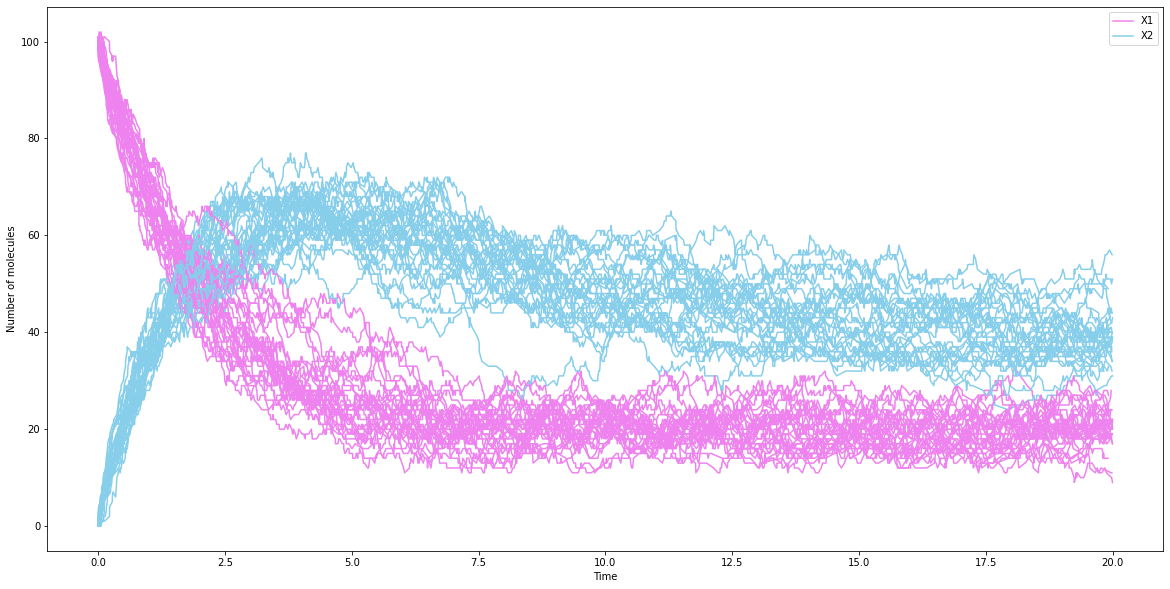

In [6]:
M = np.array([[100, 0]]).T # has shape (2, 1)
c = [10.0, 0.25, 0.5]
max_time = 20


plt.figure(figsize = (20,10))
plt.xlabel('Time');
plt.ylabel('Number of molecules')

for i in range(0, 30-1):
    T, X = gillespie_rna(M, c, max_time)
    x1=X[:,0]
    x2=X[:,1]
    plt.plot(T,x1,'violet')
    plt.plot(T,x2,'skyblue')
    

plt.legend(('X1', 'X2'));

In [7]:
X_final=np.zeros((29, 2))
for i in range(0, 30-1):
    T, X = gillespie_rna(M, c, max_time)
    X_final[i]=X[len(X)-1]
    
x1_final=X_final[:,0]
x2_final=X_final[:,1]
print(np.mean(x1_final))
print(np.var(x1_final))
print(np.mean(x2_final))
print(np.var(x2_final))


Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
Reached max time.
19.24137931034483
10.4589774078478
42.51724137931034
40.1807372175981


## 2. Approximate simulation (2 p)

Simulate the system by solving the corresponding chemical Langevin equation  using the Euler-Maruyama method. Use `Delta_t = 0.005`. Each solution generates one realization of the diffusion process. Plot one realization with time on the x-axis. You can use the code template below.

In [8]:
def euler_maruyama_rna(M, c, max_time, Delta_t):
    """Euler-Maruyama algorithm for simulating one realization of the diffusion process.

    :param M: Initial state, numpy array with shape (2, 1).
    :param c: Vector of stochastic rate constants, list with length 3.
    :param max_time: Length of simulation time span, one number.
    :param Delta_t: Time step, one number.
    
    :return: 
        T - One-dimensional numpy array containing time points.
        X - Two dimensional numpy array, where the rows contain the system state at each time point.
    """
    num_steps = int(np.ceil(max_time/Delta_t)) # determine number of steps
    T = np.zeros(num_steps)       # store time points in this array
    X = np.zeros((num_steps, 2))  # store the states in this array
    
    # Initialize the system with initial numbers of molecules and initial time
    X[0,:] = M.flatten()
    T[0] = 0.0

    S = np.array([[1,0,-1],[0,-1,1]]) # stoichiometry matrix

    # Main loop
    for idx in range(num_steps-1):
        rates = np.array([c[0], X[idx,1]*c[1], X[idx,0]*c[2]]).reshape(1,3) # reaction hazards
        T[idx+1] = T[idx] + Delta_t # update time
        Delta_W = np.random.normal(loc = 0, scale = np.sqrt(Delta_t),size=3) # generate normally distributed random numbers
        x_d = S*(rates*Delta_t + np.diag(np.sqrt(rates))*Delta_W)
        x_new = X[idx,:] + np.sum(x_d,axis=1) # compute new state
        
        # truncate at zero to avoid negative values
        x_new[x_new < 0] = 0.0
        X[idx+1,:] = x_new
    
    return T, X

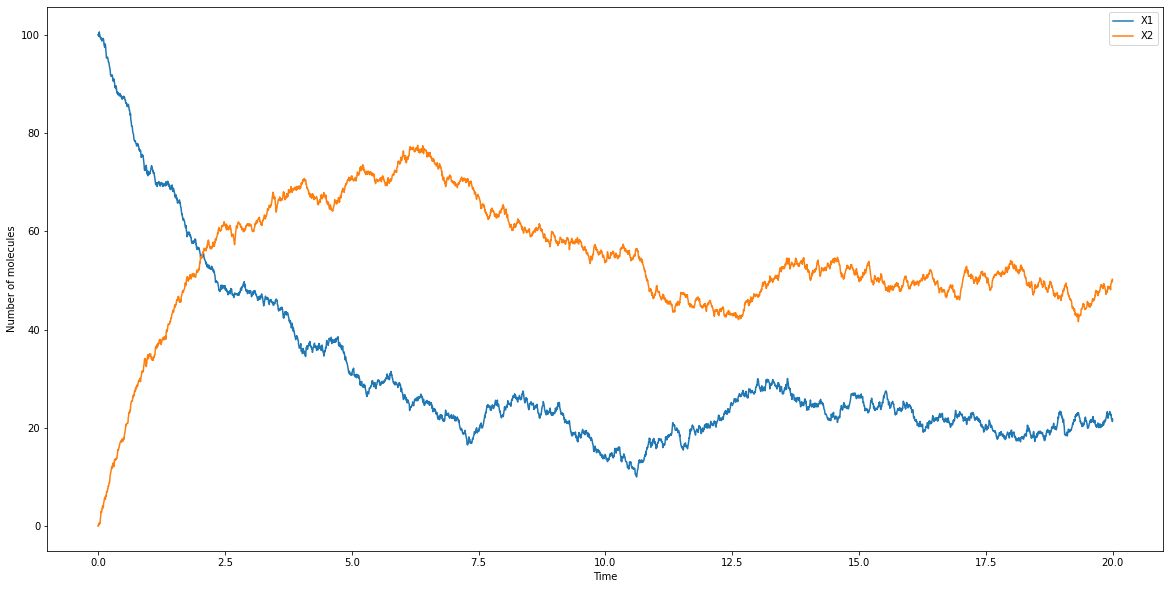

In [9]:
M = np.array([[100, 0]]).T # has shape (2, 1)
c = [10.0, 0.25, 0.5]
max_time = 20
Delta_t = 0.005

plt.figure(figsize = (20,10))
plt.xlabel('Time');
plt.ylabel('Number of molecules')
T, X = euler_maruyama_rna(M, c, max_time, Delta_t)
plt.plot(T,X)
plt.legend(('X1', 'X2'));

## 3. Deterministic simulation (2.5 p)

If we model the time-dependent *concentrations* $y_i(t) = [X_i](t)$ of each species, using *the law of mass action*, our model can be written as a linear ordinary differential equation

\begin{equation}
\frac{d}{dt} \textbf{y}(t) = A \textbf{y}(t) + \textbf{b},
\end{equation}

where $\textbf{y}(t) = [y_1(t), y_2(t)]^{\top}$. 

**a)** Write the matrix $A$ and vector **b** for our system in terms of the *deterministic* rate constants $k_1, k_2, k_3$.

**b)** Solve the steady state $\textbf{y}(t) = \textbf{y}^*$ of the system, which is defined as the solution to $\frac{d}{dt} \textbf{y}(t) = 0$. Give your answer in terms of the deterministic rate constants.

**c)**  Assume that the system is in a volume of $V = N_A^{-1}$, where $N_A$ is the Avogadro number. Then the deterministic rate constants have the same values as the stochastic ones (don't think about units here). What is the steady state you get when you plug in the values of $k_1, k_2, k_3$ in the formula you obtained in **b)**.

**d)** Use the numerical ODE solver [scipy.integrate_solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp) to numerically "solve" the ordinary differential equation system at equally spaced time points `t = np.linspace(0, 20, 101)`, using the initial state $\textbf{y}(0) = [100, 0]$. Plot the solution $\textbf{y}(t)$ so that $y_1$ and $y_2$ are in the same figure (using different colours) with time on the x-axis.

**e)** Compare your simulations in Problems 1, 2 and 3. Do you think that the system has reached its steady state at $t=20$?

In [11]:
# a) Write the matrix  𝐴 and vector b for our system in terms of the deterministic rate constants  𝑘1,𝑘2,𝑘3

A = np.array([["-k3",0],["-k2","k3"]])
b = ["k1",0]
print(A)
print(b)

[['-k3' '0']
 ['-k2' 'k3']]
['k1', 0]


b) Solve the steady state  𝐲(𝑡)=𝐲∗ of the system, which is defined as the solution to  𝑑𝑑𝑡𝐲(𝑡)=0. 
Give your answer in terms of the deterministic rate constants.
    
    [y2] = k1/k2  and  [y1] = k1/k3

c)  Assume that the system is in a volume of  𝑉=𝑁−1𝐴, where  𝑁𝐴 is the Avogadro number. 
Then the deterministic rate constants have the same values as the stochastic ones (don't think about units here).
What is the steady state you get when you plug in the values of 𝑘1,𝑘2,𝑘3 in the formula you obtained in b)?

In [12]:
y_1 = 10.0/0.5
y_2 = 10.0/0.25
print(y_1)
print(y_2)

20.0
40.0


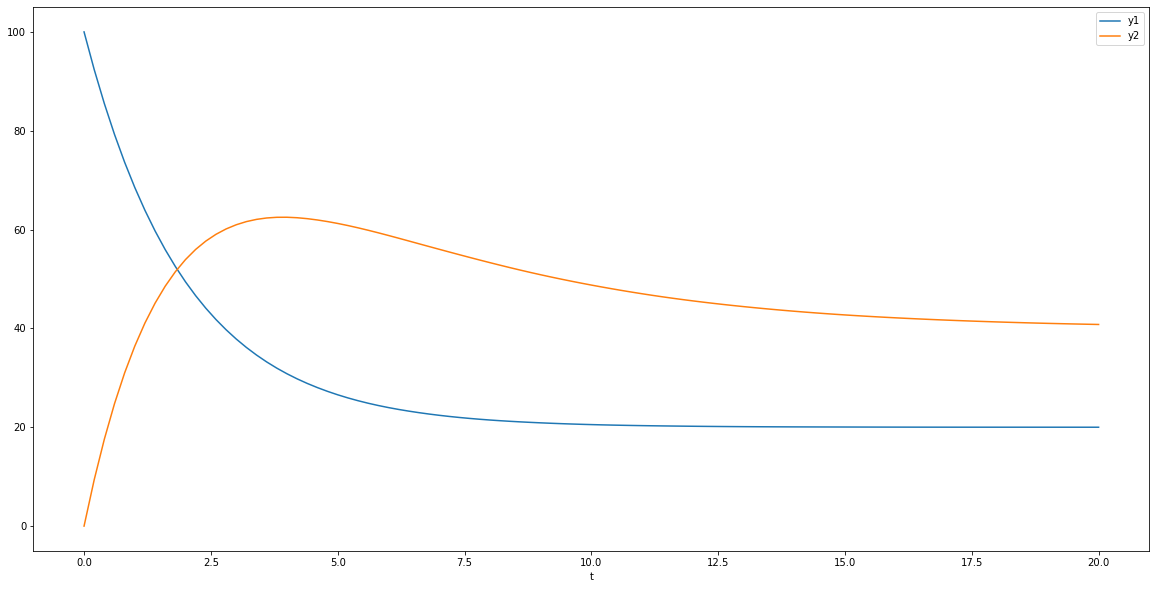

In [13]:
# d)

y0 = [100,0]
def lotkavolterra(t,state,k1,k2,k3):
    y1, y2 = state
    return [k1 - k3*y1, -k2*y2 + k3*y1]
    
p = [10.0, 0.25, 0.5]
sol = solve_ivp(lotkavolterra, [0,20], y0, args=p,dense_output=True)

t = np.linspace(0, 20, 101)
z = sol.sol(t)

plt.figure(figsize = (20,10))
plt.plot(t, z.T)
plt.xlabel('t')
plt.legend(['y1', 'y2'])
plt.show()

e) Compare your simulations in Problems 1, 2 and 3. Do you think that the system has reached its steady state at  𝑡=20?

    I think the system has reached its steady state at t=20, because the y1 and y2 values are not changing anymore.